<a href="https://colab.research.google.com/github/n1lima/dashboard-imersao-dados-python/blob/main/imersao_dados_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Explore Dados com Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
linhas, colunas = df.shape[0], df.shape[1]
print(f'Linhas: {linhas}\nColunas: {colunas}')

Linhas: 133349
Colunas: 11


In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
renomear_colunas = {'work_year': 'ano',
                    'experience_level': 'senioridade',
                    'employment_type': 'contrato',
                    'job_title': 'cargo',
                    'salary': 'salario',
                    'salary_currency': 'moeda',
                    'salary_in_usd': 'salario_em_dolar',
                    'employee_residence': 'residencia',
                    'remote_ratio': 'remoto',
                    'company_location': 'empresa',
                    'company_size': 'tamanho_da_empresa'
                    }

df.rename(columns=renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda',
       'salario_em_dolar', 'residencia', 'remoto', 'empresa',
       'tamanho_da_empresa'],
      dtype='object')

In [8]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [9]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [10]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [11]:
df['tamanho_da_empresa'].value_counts()

,count
tamanho_da_empresa,
M,129561
L,3574
S,214


In [12]:
renomear_senioridade = {'SE': 'Senior',
                        'MI': 'Pleno',
                        'EN': 'Junior',
                        'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].map(renomear_senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [13]:
renomear_contrato = {'FT': 'Integral',
                    'PT': 'Parcial',
                    'FL': 'Freelancer',
                    'CT': 'Contrato'
}
df['contrato'] = df['contrato'].replace(renomear_contrato)
df['contrato'].value_counts()

,count
contrato,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [14]:
renomear_tamanho_empresa = {'S': 'Pequeno',
                    'M': 'Media',
                    'L': 'Grande'
}
df['tamanho_da_empresa'] = df['tamanho_da_empresa'].replace(renomear_tamanho_empresa)
df['tamanho_da_empresa'].value_counts()

,count
tamanho_da_empresa,
Media,129561
Grande,3574
Pequeno,214


In [15]:
renomear_remoto = {0: 'Presencial',
                    50: 'Hibrido',
                    100: 'Remoto'
}
df['remoto'] = df['remoto'].map(renomear_remoto)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [16]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_em_dolar,residencia,remoto,empresa,tamanho_da_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [17]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_da_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,ano,salario,salario_em_dolar
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 2 - Aprenda a Limpar e Preparar os Dados

In [21]:
import numpy as np

In [ ]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,salario_em_dolar,residencia,remoto,empresa,tamanho_da_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
salario_em_dolar,0
residencia,0
remoto,0
empresa,0


In [19]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [20]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,salario_em_dolar,residencia,remoto,empresa,tamanho_da_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [27]:
# Criando um DataFrame para substituir valores nulos nele

df_salarios = pd.DataFrame({
    'nome': ['Marcos', 'Bruna', 'Luana', 'João', 'Jonas'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# Calcula a média salarial e substitui os nulos pela média
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Calcula a mediana salarial e substiui os nulos pela mediana (mais indicado para valores discrepantes)
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Marcos,4000.0,4000.00,4000.0
1,Bruna,NaN,36333.33,5000.0
2,Luana,5000.0,5000.00,5000.0
3,João,NaN,36333.33,5000.0
4,Jonas,100000.0,100000.00,100000.0


In [31]:
df_temperatura = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperatura['preenchido_ffill'] = df_temperatura['Temperatura'].ffill()
df_temperatura

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [32]:
df_temperatura = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperatura['preenchido_ffill'] = df_temperatura['Temperatura'].bfill()
df_temperatura

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [33]:
df_cidades = pd.DataFrame ({
    'nome': ['Marcos', 'Bruna', 'Luana', 'João', 'Jonas'],
    'cidade': ['Santos', np.nan, 'Curitiba', np.nan, 'Saõ Bernardo']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não Informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Marcos,Santos,Santos
1,Bruna,NaN,Não Informado
2,Luana,Curitiba,Curitiba
3,João,NaN,Não Informado
4,Jonas,Saõ Bernardo,Saõ Bernardo


In [36]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
salario_em_dolar,0
residencia,0
remoto,0
empresa,0


In [38]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [40]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ano                 133339 non-null  int64 
 1   senioridade         133339 non-null  object
 2   contrato            133339 non-null  object
 3   cargo               133339 non-null  object
 4   salario             133339 non-null  int64 
 5   moeda               133339 non-null  object
 6   salario_em_dolar    133339 non-null  int64 
 7   residencia          133339 non-null  object
 8   remoto              133339 non-null  object
 9   empresa             133339 non-null  object
 10  tamanho_da_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [39]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_em_dolar,residencia,remoto,empresa,tamanho_da_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


# Aula 3 - Visualização de Dados

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

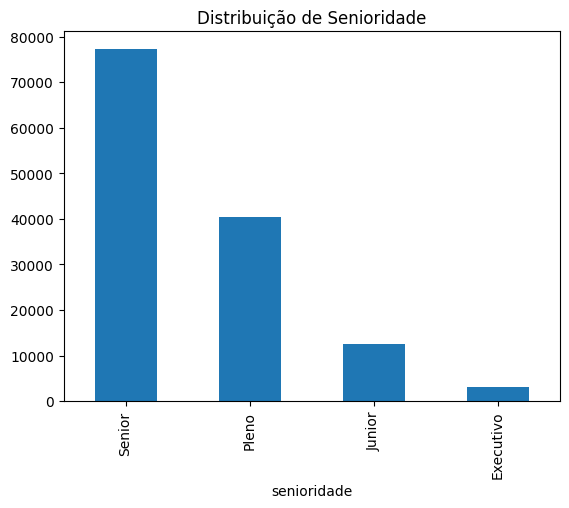

In [41]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

<Axes: xlabel='senioridade', ylabel='salario_em_dolar'>

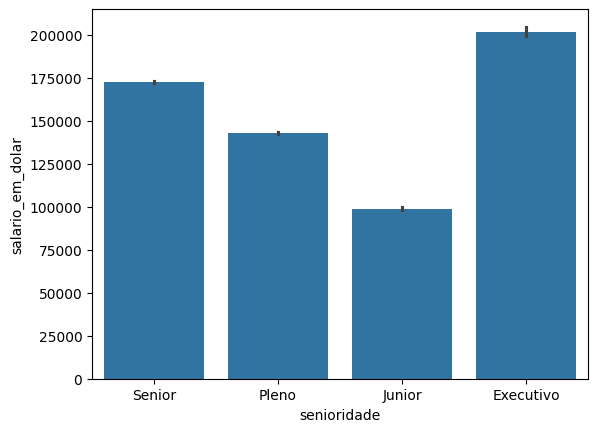

In [45]:
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar')

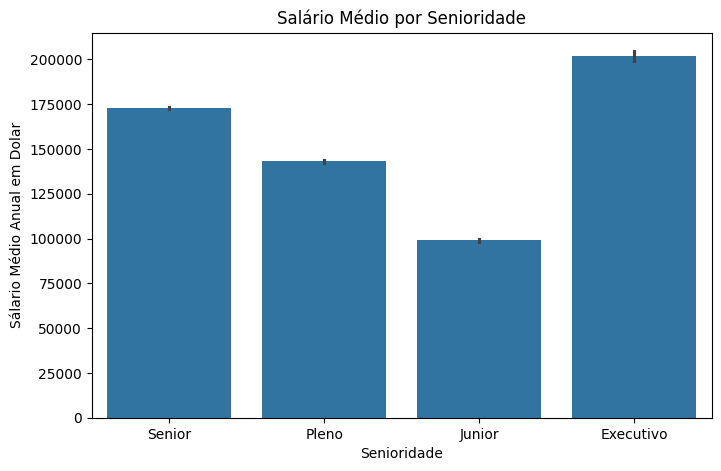

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar')
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Sálario Médio Anual em Dolar')
plt.show()

In [51]:
df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending=False)

,salario_em_dolar
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [56]:
ordem = df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending=False).index

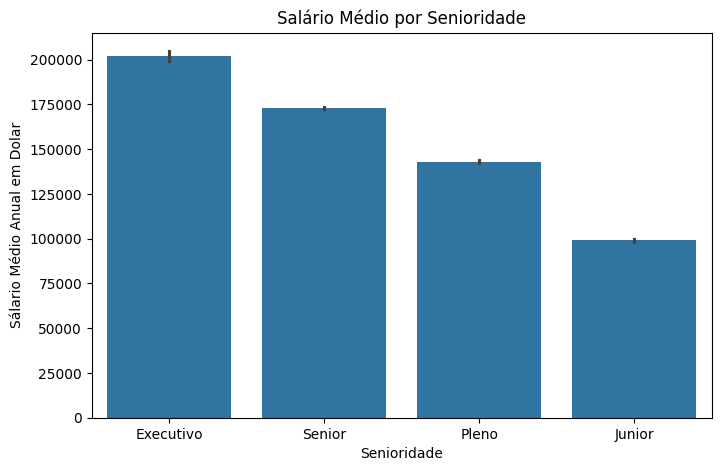

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar', order = ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Sálario Médio Anual em Dolar')
plt.show()

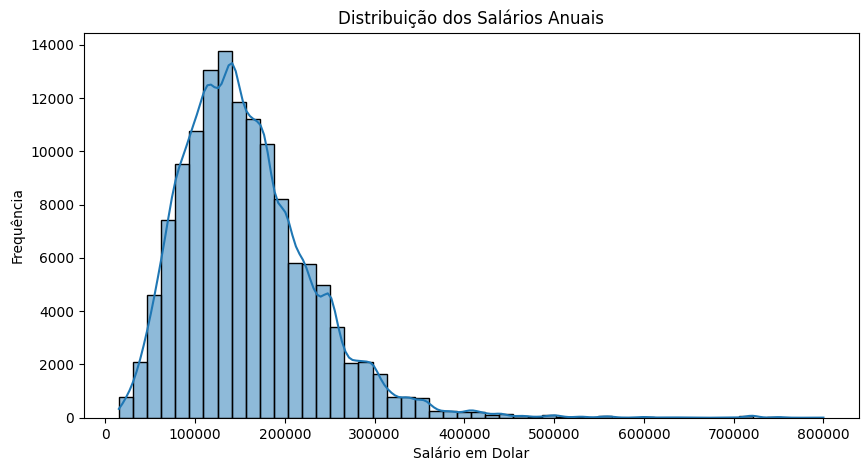

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['salario_em_dolar'], bins=50, kde=True)
plt.title('Distribuição dos Salários Anuais')
plt.xlabel('Salário em Dolar')
plt.ylabel('Frequência')
plt.show()

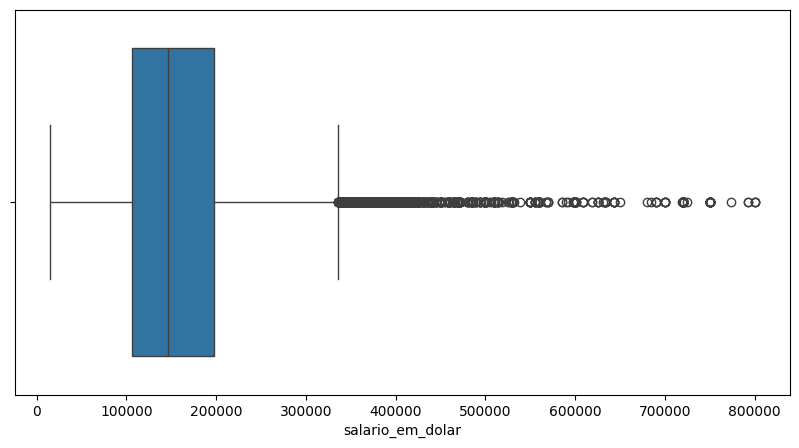

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_limpo['salario_em_dolar'])
plt.show()

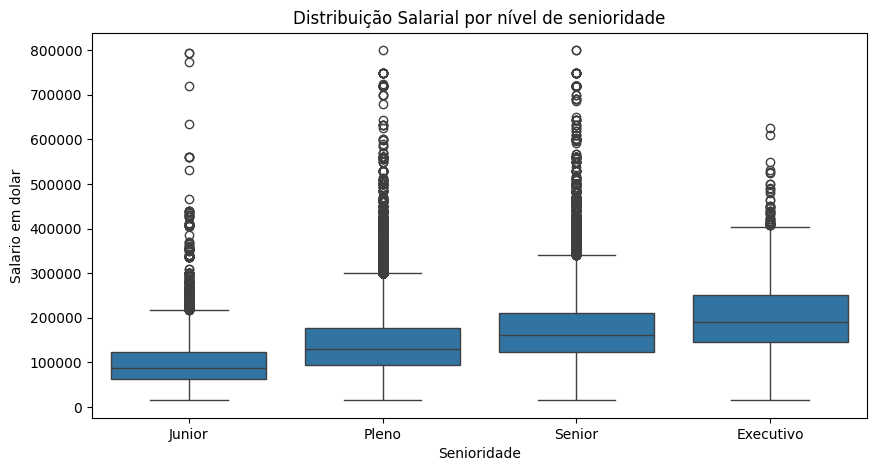

In [69]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(10,5))
sns.boxplot(x='senioridade', y ='salario_em_dolar', data=df_limpo, order=ordem_senioridade)
plt.title('Distribuição Salarial por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario em dolar')
plt.show()

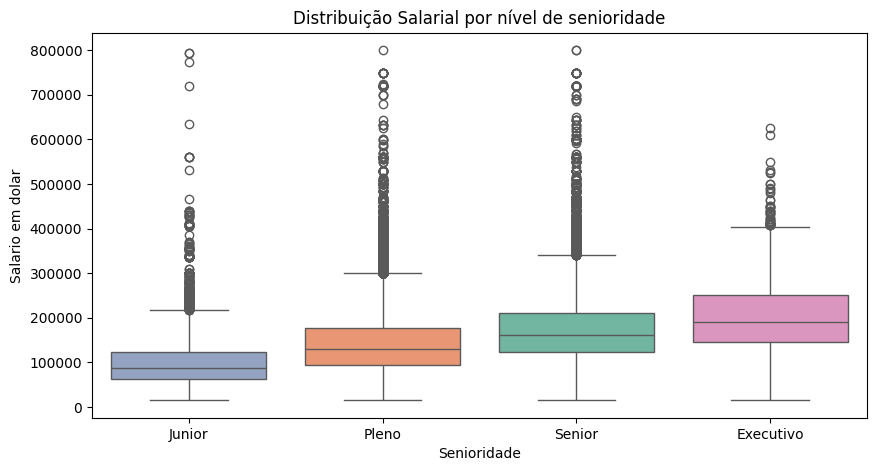

In [71]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(10,5))
sns.boxplot(x='senioridade', y ='salario_em_dolar', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição Salarial por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salario em dolar')
plt.show()

In [72]:
import plotly.express as px

In [73]:
senioridade_media_salario = df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x= 'senioridade',
             y= 'salario_em_dolar',
             title= 'Media salarial por Senioridade',
             labels= {'senioridade':'Nivel de Senioridade', 'salario_em_dolar': 'Media Salarial Anual (Em Dolar)'})

fig.show()

In [75]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho','quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de Trabalho')
fig.show()

In [78]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho','quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de Trabalho',
             hole=0.5)

fig.update_traces(textinfo='percent+label') # Para mostar o label e o percentual juntos
fig.show()

In [101]:
df_filtrado_cargo = df_limpo[df_limpo['cargo'] == 'Data Scientist']
salario_media_por_pais = df_filtrado_cargo.groupby('residencia')['salario_em_dolar'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(salario_media_por_pais,
             x = 'residencia',
             y = 'salario_em_dolar',
             title = 'Salário medio por País de Cientistas de Dados',
             labels = {'residencia': 'pais que reside', 'salario_em_dolar': 'salario medio do CD'})

fig.show()

In [96]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.6 MB/s eta 0:00:00


In [102]:
import pycountry

def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

df_filtrado_cargo = df_limpo[df_limpo['cargo'] == 'Data Scientist']
salario_media_por_pais = df_filtrado_cargo.groupby('residencia_iso3')['salario_em_dolar'].mean().reset_index()

fig = px.choropleth(salario_media_por_pais,
             locations = 'residencia_iso3',
             color = 'salario_em_dolar',
             title = 'Salário medio por País de Cientistas de Dados',
             labels = {'salario_em_dolar': 'Salário Médio(USD)', 'residencia_iso3': 'País'})
fig.show()

In [103]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,salario_em_dolar,residencia,remoto,empresa,tamanho_da_empresa,residencia_iso3
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media,USA
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media,USA
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media,AUS
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media,AUS
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media,USA


In [104]:
df_limpo.to_csv('dados-imersao.csv', index=False)